In [1]:
# Importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('sleepdata.csv', sep=';')
df

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32,:),NaN,59.0,0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16,:|,Stressful day,72.0,0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30,:|,NaN,57.0,0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32,NaN,NaN,NaN,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44,:),Drank coffee:Drank tea,68.0,0
...,...,...,...,...,...,...,...,...
882,2018-02-12 21:54:14,2018-02-13 07:02:15,91%,9:08,NaN,NaN,NaN,56
883,2018-02-13 23:49:19,2018-02-14 07:00:53,81%,7:11,NaN,NaN,NaN,64
884,2018-02-14 21:24:05,2018-02-15 06:20:52,71%,8:56,NaN,NaN,NaN,3316
885,2018-02-15 21:36:32,2018-02-16 06:50:31,80%,9:13,NaN,NaN,NaN,6555


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Start               887 non-null object
End                 887 non-null object
Sleep quality       887 non-null object
Time in bed         887 non-null object
Wake up             246 non-null object
Sleep Notes         652 non-null object
Heart rate          162 non-null float64
Activity (steps)    887 non-null int64
dtypes: float64(1), int64(1), object(6)
memory usage: 55.6+ KB


In [6]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

In [10]:
df['hours_slept'] = (df['End']-df['Start']).astype('timedelta64[h]')

In [11]:
df

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps),hours_slept
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32,:),NaN,59.0,0,8.0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16,:|,Stressful day,72.0,0,0.0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30,:|,NaN,57.0,0,8.0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32,NaN,NaN,NaN,0,7.0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44,:),Drank coffee:Drank tea,68.0,0,6.0
...,...,...,...,...,...,...,...,...,...
882,2018-02-12 21:54:14,2018-02-13 07:02:15,91%,9:08,NaN,NaN,NaN,56,9.0
883,2018-02-13 23:49:19,2018-02-14 07:00:53,81%,7:11,NaN,NaN,NaN,64,7.0
884,2018-02-14 21:24:05,2018-02-15 06:20:52,71%,8:56,NaN,NaN,NaN,3316,8.0
885,2018-02-15 21:36:32,2018-02-16 06:50:31,80%,9:13,NaN,NaN,NaN,6555,9.0


In [17]:
df['Sleep quality'] = df['Sleep quality'].str.replace("%", "")
df['Sleep quality'] = df['Sleep quality'].astype('float')

In [18]:
X = df['hours_slept'].values
y = df['Sleep quality'].values

c:\users\asus vivobook\miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


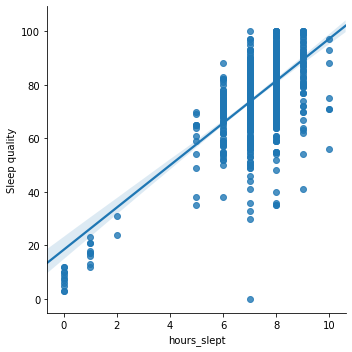

In [19]:
sns.lmplot('hours_slept', 'Sleep quality', data=df)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True)

In [29]:
linear = LinearRegression()
linear.fit(X_train.reshape(-1, 1), y_train)
yhat = linear.predict(X_test.reshape(-1, 1))
mean_squared_error(yhat, y_test)

108.90655222632394

In [30]:
tree = DecisionTreeRegressor()
tree.fit(X_train.reshape(-1, 1), y_train)
yhat = tree.predict(X_test.reshape(-1, 1))
mean_squared_error(yhat, y_test)

102.76340079685407

In [34]:
forest = RandomForestRegressor()
forest.fit(X_train.reshape(-1, 1), y_train)
yhat = forest.predict(X_test.reshape(-1, 1))
mean_squared_error(yhat, y_test)

7.862896772325965

In [32]:
svm = SVR()
svm.fit(X_train.reshape(-1, 1), y_train)
yhat = svm.predict(X_test.reshape(-1, 1))
mean_squared_error(yhat, y_test)

175.55739431294822

In [36]:
import pickle
pickle.dump(forest, open('forest.obj', 'wb'))